In [69]:
using Plots
using Statistics

# Reading and plotting temperature data

This notebook demonstrates how to plot the [HadCRUT4](https://crudata.uea.ac.uk/cru/data/temperature/) annual mean temperatures, using the [Julia](https://julialang.org) programming language, together with some multi-year averages.

## Load the data
Obtained from https://crudata.uea.ac.uk/cru/data/temperature/HadCRUT4-gl.dat

The mean temperature is at the end of each second line.

In [70]:
years = Int[]
T = Float64[]
for (i,l) in enumerate(eachline("HadCRUT4-gl.dat"))
    if i % 2 != 0
        spl = split(l)
        push!(years, parse(Int,spl[1]))
        push!(T, parse(Float64,spl[end]))
    end
end

## Compute the averaged data
Change `period` below to the number of desired years, and `startyear` for the start of the first averaging period.

In [75]:
period = 30
startyear = 1867
yearsmovavg = Int[]
Tmovavg = Float64[]
yearsavg = Int[]
Tavg = Float64[]
for i in period:length(years)
    push!(yearsmovavg, years[i])
    push!(Tmovavg,mean(T[i-(period-1):i]))
end
i_start = searchsortedfirst(years, startyear)
while i_start+period < length(years)
    idx_range = i_start:i_start+period-1
    meantemp = mean(T[idx_range])
    push!(yearsavg, years[i_start])
    push!(Tavg, NaN)
    append!(yearsavg, years[idx_range])
    append!(Tavg, fill(meantemp, period))
    i_start += period
end

## Plot the data and averages

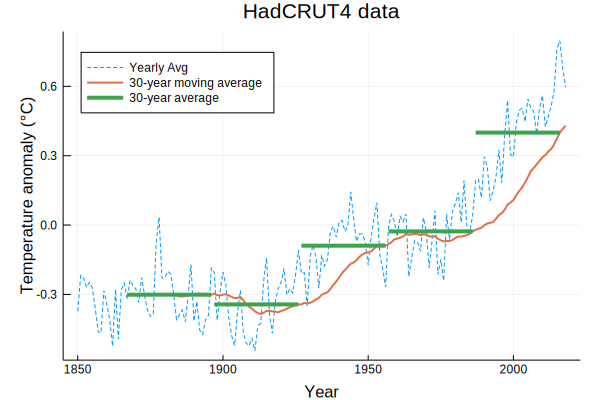

In [76]:
plot(years, T,
    label="Yearly Avg",
    xlabel="Year", ylabel="Temperature anomaly (°C)",linestyle=:dash)
plot!(yearsmovavg, Tmovavg, label="$period-year moving average",linewidth=2)
plot!(yearsavg, Tavg, label="$period-year average",linewidth=4,legend=:topleft)
title!("HadCRUT4 data")


## Change of the moving average
Here, we plot the change of the moving average with respect to the previous year. Positive values means it increased.

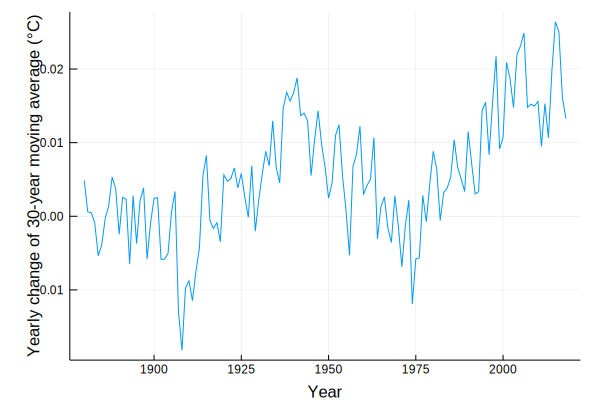

In [77]:
avgdiff = Tmovavg[2:end] - Tmovavg[1:end-1]
plot(yearsmovavg[2:end], avgdiff,legend=:none,ylabel="Yearly change of $period-year moving average (°C)", xlabel="Year")

The last year this change was negative is:

In [78]:
yearsmovavg[2:end][findlast(ΔT -> ΔT < 0, avgdiff)]

1982